In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'D:\\学习课件\\405\\active_data.tsv'
df_raw = pd.read_csv(file, sep='\t')
print(df_raw.shape)
df_raw.head(1)

(5923, 61)


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.1,UniProt (SwissProt) Entry Name of Target Chain.1,UniProt (SwissProt) Primary ID of Target Chain.1,UniProt (SwissProt) Secondary ID(s) of Target Chain.1,UniProt (SwissProt) Alternative ID(s) of Target Chain.1,UniProt (TrEMBL) Submitted Name of Target Chain.1,UniProt (TrEMBL) Entry Name of Target Chain.1,UniProt (TrEMBL) Primary ID of Target Chain.1,UniProt (TrEMBL) Secondary ID(s) of Target Chain.1,UniProt (TrEMBL) Alternative ID(s) of Target Chain.1
0,50965826,CNC(=O)COc1cccc(Nc2ncc(F)c(Nc3ccc4OC(F)(F)C(=O...,InChI=1S/C21H17F3N6O4/c1-25-17(31)10-33-13-4-2...,MOXXQFNQDDSJHT-UHFFFAOYSA-N,50396071,CHEMBL2170582,Tyrosine-protein kinase SYK,Homo sapiens,1.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_raw[['BindingDB MonomerID', 'Ligand SMILES', 'BindingDB Ligand Name', 'Ki (nM)', 'IC50 (nM)', 
            'Kd (nM)', 'EC50 (nM)', 'pH', 'Article DOI', 'PMID', 'PubChem AID', 'Patent Number']].copy(deep=True)
df.head(3)

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number
0,50396071,CNC(=O)COc1cccc(Nc2ncc(F)c(Nc3ccc4OC(F)(F)C(=O...,CHEMBL2170582,1.8,NaN,NaN,NaN,NaN,10.1021/jm201271b,22257213.0,NaN,NaN
1,50275934,Cc1cc(C)cc(Nc2nccc(n2)-c2ncc(CO)s2)c1,"(2-(2-(3,5-dimethylphenylamino)pyrimidin-4-yl)...",4,NaN,NaN,NaN,NaN,10.1016/j.bmcl.2008.09.106,18938080.0,NaN,NaN
2,50325991,COc1ccc(cc1OC)-c1cc2nccn2c(Nc2ncccc2C(N)=O)n1,"2-(7-(3,4-dimethoxyphenyl)imidazo[1,2-c]pyrimi...",7.5,NaN,NaN,NaN,NaN,10.1016/j.chembiol.2005.04.011,15975507.0,NaN,NaN


# 删除全部为空的无用列

In [4]:
print(df.shape)
df.dropna(axis=1, how='all', inplace=True)
print(df.shape)

(5923, 12)
(5923, 12)


# 查看四个活性值均缺失的行

In [5]:
df[df['Ki (nM)'].isnull() & df['IC50 (nM)'].isnull() & df['Kd (nM)'].isnull() & df['EC50 (nM)'].isnull()]

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number


或

In [6]:
df[df[['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']].isnull().sum(axis=1) == 4]

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number


# 查看包含活性值类型多于1种的行

In [7]:
df[df[['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']].notnull().sum(axis=1) > 1]

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number
2377,100350,CS(=O)(=O)N1CCN(CC1)c1ccc(Nc2ncc(C(N)=O)c(NC3C...,"US8501944, 372::US8501944, 375::US9868729, Exa...",NaN,15,4.5,NaN,NaN,NaN,NaN,NaN,US8501944


# 对活性值种类多于1的记录任取一种

In [8]:
df.loc[df[df[['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']].notnull().sum(axis=1) > 1].index.tolist(), 'IC50 (nM)'] = np.nan

In [9]:
df.loc[[2377]]

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number
2377,100350,CS(=O)(=O)N1CCN(CC1)c1ccc(Nc2ncc(C(N)=O)c(NC3C...,"US8501944, 372::US8501944, 375::US9868729, Exa...",NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,US8501944


# 将活性类别中的NaN替换为''

In [10]:
df.loc[:, ['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']] = df[['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']].fillna('')

# 将活性值合并到一列

In [11]:
df['activity'] = df['Ki (nM)'] + df['IC50 (nM)'] + df['Kd (nM)'] + df['EC50 (nM)']

In [12]:
df.head(1)

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number,activity
0,50396071,CNC(=O)COc1cccc(Nc2ncc(F)c(Nc3ccc4OC(F)(F)C(=O...,CHEMBL2170582,1.8,,,,NaN,10.1021/jm201271b,22257213.0,NaN,NaN,1.8


# 新建一列记录活性单位

In [13]:
for index, row in df.iterrows():
    if row['Ki (nM)'] != '':
        df.loc[index, 'unit'] = 'Ki (nM)'
    elif row['IC50 (nM)'] != '':
        df.loc[index, 'unit'] = 'IC50 (nM)'
    elif row['Kd (nM)'] != '':
        df.loc[index, 'unit'] = 'Kd (nM)'
    elif row['EC50 (nM)'] != '':
        df.loc[index, 'unit'] = 'EC50 (nM)'

In [14]:
df.head(1)

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number,activity,unit
0,50396071,CNC(=O)COc1cccc(Nc2ncc(F)c(Nc3ccc4OC(F)(F)C(=O...,CHEMBL2170582,1.8,,,,NaN,10.1021/jm201271b,22257213.0,NaN,NaN,1.8,Ki (nM)


# 查看不含“<”和“>”数据的统计量

In [15]:
df[~df['activity'].str.contains('<|>')]['activity'].astype('float64').describe()

count    5.192000e+03
mean     8.851735e+03
std      2.438747e+05
min      0.000000e+00
25%      1.140000e+01
50%      5.500000e+01
75%      3.691750e+02
max      1.200000e+07
Name: activity, dtype: float64

根据统计量得出的结论：<br />
1.最小值为0的数据，需要检查一下<br />
2.前四分之一分位为11 nM，中位数为55 nM

# 检查活性为0的数据

In [16]:
df[~df['activity'].str.contains('<|>')][df[~df['activity'].str.contains('<|>')]['activity'].astype('float64') == 0]

,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number,activity,unit
1540,140389,CCCn1cc(cn1)-c1cc(O[C@H](C)[C@H]2CNC(=O)C2)c2c...,"US8912173, 114::US9914735, Example 114",,0,,,7.5,NaN,NaN,NaN,US8912173,0,IC50 (nM)
1541,140390,CC(C)n1cc(cn1)-c1cc(O[C@H](C)[C@H]2CNC(=O)C2)c...,"US8912173, 115::US9914735, Example 115",,0,,,7.5,NaN,NaN,NaN,US8912173,0,IC50 (nM)
1542,140325,C[C@@H](Oc1cc(cc2ncccc12)-c1ccc(CN(C)C(C)=O)cc...,"US8912173, 51",,0,,,7.5,NaN,NaN,NaN,US8912173,0,IC50 (nM)


化合物来自于一篇专利，可能没有报道活性，且缺失数据较少，故直接删掉

# 获取活性值为0的数据的索引

In [17]:
index_del = df[~df['activity'].str.contains('<|>')][df[~df['activity'].str.contains('<|>')]['activity'].astype('float64') == 0].index.to_list()
index_del

[1540, 1541, 1542]

# 删除活性值为0的数据

In [18]:
print(df.shape)
df.drop(index=index_del, inplace=True)
print(df.shape)

(5923, 14)
(5920, 14)


# 查看重复数据数量

In [19]:
df.shape[0] - len(df.groupby('Ligand SMILES'))

965

# 回归模型中的重复值及大小于号处理
不重复分子<br />
* 数值型直接保存<br />
* 带符号则判断与min_cutoff和max_cutoff关系，在阈值范围内则保留<br />

重复分子<br />
* 都为数值型。计算相差倍数，相差100倍以内用平均值表示，相差100倍以上舍弃。<br />
* 都含大于号，取最大值，判断与阈值max_cutoff关系，并做处理<br />
* 只含大于和数值，判断是否冲突，是则舍弃，否则保留数值<br />
* 都含小于号，取最小值，判断与阈值min_cutoff关系，并做处理<br />
* 只含小于和数值，判断是否冲突，按需保留<br />
* 大小于混在一起，且没有数值，判断是否冲突<br />
* 大小于混在一起，但含有数值，看是否冲突，冲突则舍弃，不冲突保留活性值。

In [20]:
def affinityProcess(df, smiles_col, affinity_col, min_cutoff, max_cutoff):
    '''Group by smiles_col and scrutinize activity_col.
    
    df: dataframe containing smiles and affinity.
    smiles_col: the name of the column contains smiles.
    affinity_col: the name of the column contains affinity.
    min_cutoff: when the affinity contains "<" and the following number lower
                than min_cutoff, the affinity will be conserved.
    max_cutoff: when the affinity contains ">" and the following number greater
                than max_cutoff, the affinity will be conserved.
    '''
    def numberTerminator(seq, index):
        '''Handle the (duplicated) number(s) without any notations.
        
        seq: a (list of) number(s) for the duplicate record(s).
        index: the index of the duplicate record(s).
        '''
        if isinstance(seq, list):
            if max(seq) / min(seq) > 100:
                df.loc[index, 'flag'] = 'del'
            else:
                df.loc[index, affinity_col] = np.mean(seq)
        else:
            df.loc[index, affinity_col] = seq
            
    def notationTerminator(symbol, number, index):
        '''Handle the number(s) with notations.
        
        symbol: "<" or ">"
        number: a (list of) number(s) for the duplicate record(s).
        index: the index of the duplicate record(s).
        '''
        if symbol == '<':
            if isinstance(number, list):
                number = min(number)
            if number < min_cutoff:
                df.loc[index, affinity_col] = number / 2
            else:
                df.loc[index, 'flag'] = 'del'
        else:
            if isinstance(number, list):
                number = max(number)
            if number > max_cutoff:
                df.loc[index, 'flag'] = 'random'
            else:
                df.loc[index, 'flag'] = 'del'

    def valueToNumber(value):
        '''Transform the scientific notation or string into numbers.'''
        value = str(value).strip('> <')
        if 'e' in value:
            v1, v2 = value.split('e')
            value = float(v1) * 10 ** float(v2)
            return value
        else:
            return float(value)

    for smi, group in df.groupby(smiles_col):
        judge = ''.join(map(str, list(group[affinity_col]))) # string
        index = group.index.tolist()

        # Unique data
        if len(group) == 1:
            data_num = valueToNumber(judge) # number
            if '<' in judge:
                notationTerminator('<', data_num, index)
            elif '>' in judge:
                notationTerminator('>', data_num, index)
            else:
                numberTerminator(data_num, index)
                
        # duplicate data
        elif len(group) >1:
            amount = len(group)

            # contains only numbers
            if '<' not in judge and '>' not in judge:
                seq = list(group[affinity_col].apply(valueToNumber))
                numberTerminator(seq, index)

            # contain “>”, without “<”
            elif '<' not in judge and '>' in judge:
                # all contain “>”
                if judge.count('>') == amount:
                    seq = list(group[affinity_col].apply(valueToNumber))
                    notationTerminator('>', seq, index)
                # contain “>” and numbers
                else:
                    imax = np.inf
                    imin = -np.inf
                    iseq = []
                    for i, row in group.iterrows():
                        act = str(row[affinity_col])
                        act_num = valueToNumber(act)
                        if '>' in act:
                            imin = max(imin, act_num)
                        else:
                            imax = min(imax, act_num)
                            iseq.append(act_num)
                    # reasonable or not
                    if imax > imin:
                        numberTerminator(iseq, index)
                    else:
                        df.loc[index, 'flag'] = 'del'

            # contain “<”, without“>”
            elif '>' not in judge and '<' in judge:
                # all contain “<”
                if judge.count('<') == amount:
                    seq = list(group[affinity_col].apply(valueToNumber))
                    notationTerminator('<', seq, index)
                # contain “<” and numbers
                else:
                    imax = -np.inf
                    imin = np.inf
                    iseq = []
                    for i, row in group.iterrows():
                        act = str(row[affinity_col])
                        act_num = valueToNumber(act)
                        if '<' in act:
                            imin = min(imin, act_num)
                        else:
                            imax = max(imax, act_num)
                            iseq.append(act_num)
                    # logical or not
                    if imax < imin:
                        numberTerminator(iseq, index)
                    else:
                        df.loc[index, 'flag'] = 'del'
                        
            # contain both "<" and ">"
            else:
                imax = np.inf
                imin = -np.inf
                iseq = []
                for i, row in group.iterrows():
                    act = str(row[affinity_col])
                    act_num = valueToNumber(act)
                    if '>' in act:
                        imin = max(imin, act_num)
                    elif '<' in act:
                        imax = min(imax, act_num)
                    else:
                        iseq.append(act_num)
                # reasonable  or not
                if imax > imin:
                    if iseq:
                        if imax > max(iseq) and min(iseq) > imin:
                            numberTerminator(iseq, index)
                        else:
                            df.loc[index, 'flag'] = 'del'
                    else:
                        numberTerminator([imin, imax], index)
                else:
                    df.loc[index, 'flag'] = 'del'

In [21]:
affinityProcess(df, 'Ligand SMILES', 'activity', 11, 0)

# 检查并删除有冲突的分子

In [23]:
df_del = df[df['flag'] == 'del']
print(df_del.shape)
df_del.head(3)

(456, 15)


,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number,activity,unit,flag
8,50396074,COc1ccc(cc1OC)-c1cc2nccn2c(Nc2ccc3cn[nH]c3c2)n1,CHEMBL2170585,10,,,,NaN,10.1021/jm201271b,22257213.0,NaN,NaN,10,Ki (nM),del
15,60665,COc1cc(Nc2ncc(F)c(Nc3ccc4OC(C)(C)C(=O)Nc4n3)n2...,"BDBM50249542::US9145414, R406::US9212178, R406",30,,,,NaN,10.1021/jm201271b,22257213.0,NaN,NaN,30,Ki (nM),del
29,50249540,C[C@H](CO)NC(=O)c1sc(nc1C)-c1ccnc(Nc2cc(C)cc(C...,"(R)-2-(2-(3,5-dimethylphenylamino)pyrimidin-4-...",210,,,,NaN,10.1016/j.bmcl.2008.09.106,18938080.0,NaN,NaN,210,Ki (nM),del


In [24]:
df.drop(index=df_del.index, inplace=True)

In [25]:
df_del = df[df['flag'] == 'random']
print(df_del.shape)
df_del.head(3)

(339, 15)


,BindingDB MonomerID,Ligand SMILES,BindingDB Ligand Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),pH,Article DOI,PMID,PubChem AID,Patent Number,activity,unit,flag
38,50313051,COc1ccc(cc1)-c1[nH][nH]c(=O)c1N=Nc1cccnc1,(Z)-3-(4-methoxyphenyl)-4-(2-(pyridin-3-yl)hyd...,>4000,,,,NaN,10.1016/j.bmcl.2010.01.072,20138514.0,NaN,NaN,>4000,Ki (nM),random
39,50067541,Fc1cnc2[nH]cc(-c3ncc(F)c(N[C@H]4C5CCC(CC5)[C@@...,CHEMBL3401975,>4000,,,,NaN,10.1016/j.bmcl.2015.03.013,25827523.0,NaN,NaN,>4000,Ki (nM),random
40,50067520,Fc1cnc2[nH]cc(-c3ncc(F)c(N[C@H]4C5CCC(CC5)[C@@...,CHEMBL3401982,>4000,,,,NaN,10.1016/j.bmcl.2015.03.013,25827523.0,NaN,NaN,>4000,Ki (nM),random


In [26]:
df.drop(index=df_del.index, inplace=True)

# 修改数据类型

In [27]:
df['activity'] = df['activity'].astype('float64')

# 对清洗后的数据取对数，并计算统计量

In [28]:
df['logA'] = df['activity'].apply(np.log10)
df['logA'].describe()

count    5125.000000
mean        1.754211
std         1.082660
min        -2.000000
25%         1.009451
50%         1.740363
75%         2.524396
max         7.079181
Name: logA, dtype: float64

# 绘制直方图

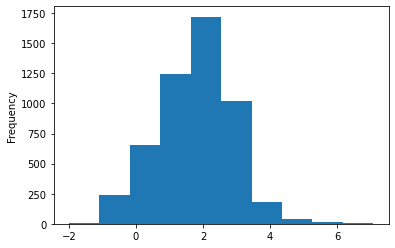

In [29]:
df['logA'].plot(kind='hist')

类似于一个正态分布，但好像有点左偏，绘制更细致的直方图

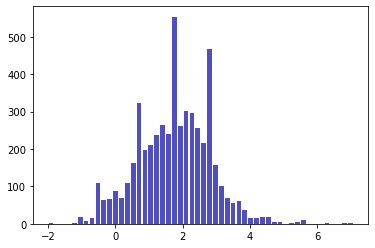

In [30]:
n, bins, patches = plt.hist(x=df['logA'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)

# 计算偏度和峰度

In [31]:
df['logA'].skew()

0.06183979509247318

In [32]:
df['logA'].kurt()

0.535388994441349

偏度大于0属于正偏态，偏度约0.1，稍有右偏

# 右偏矫正（不做也罢）

In [33]:
df['logA'] = df['activity'].apply(lambda x: np.log10(x-0.009))

In [34]:
df['logA'].skew()

0.04451474423592537

# 最后结果

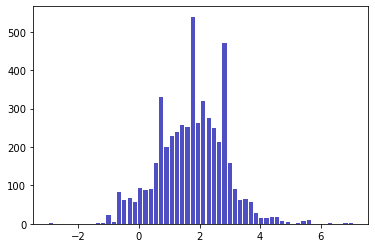

In [35]:
n, bins, patches = plt.hist(x=df['logA'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)

# 箱线图

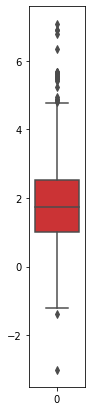

In [36]:
f, ax = plt.subplots(figsize=(1, 7))
ax = sns.boxplot(data=df['logA'] , orient="v", palette="Set1")